In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
data = pd.read_csv('behav.csv')

In [5]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

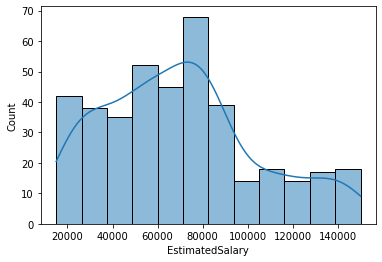

In [28]:
sns.histplot(data['EstimatedSalary'],kde=True)

<AxesSubplot:ylabel='Gender'>

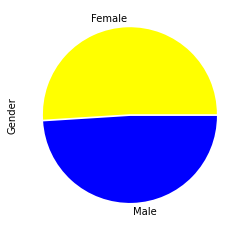

In [29]:
color=('yellow','blue')
explode=[0.01,0.01]
data['Gender'].value_counts().plot(kind='pie',colors=color,explode=explode)

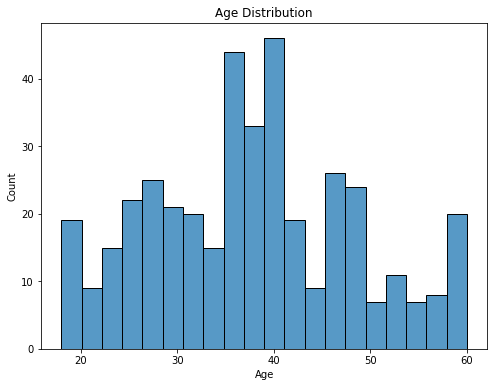

In [30]:
# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

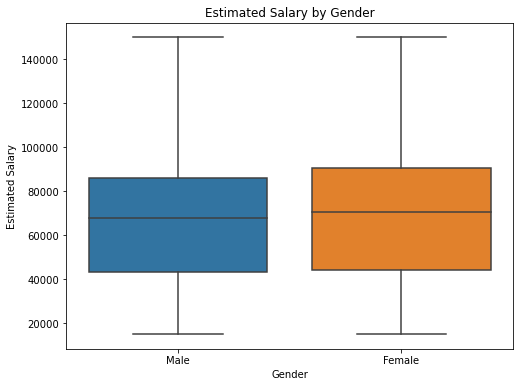

In [31]:
# Box plot of Estimated Salary by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='EstimatedSalary')
plt.title('Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

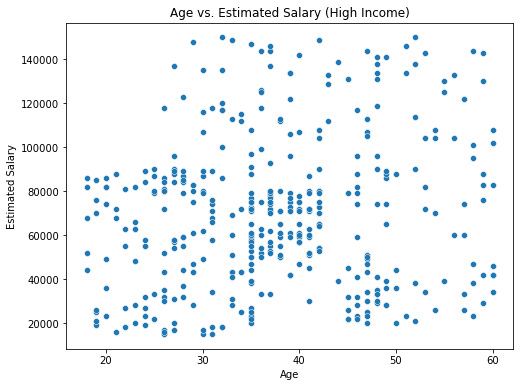

In [32]:
# Scatter plot of Age vs. Estimated Salary colored by High Income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary')
plt.title('Age vs. Estimated Salary (High Income)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

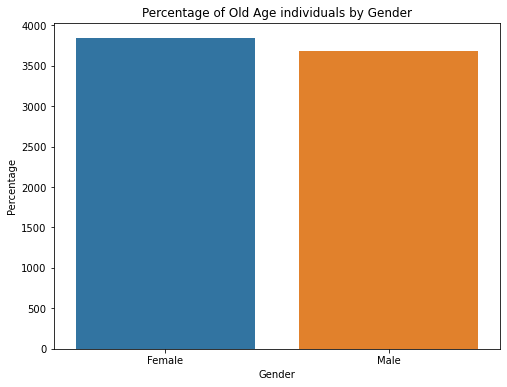

In [33]:
# Bar plot of the percentage of Old Age individuals by Gender
old_age_counts = df.groupby('Gender')['Age'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=old_age_counts.index, y=old_age_counts.values)
plt.title('Percentage of Old Age individuals by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess_inputs(df, engineer_features=False):
    df = df.copy()
    
    # Drop User ID column
    df = df.drop('User ID', axis=1)
    
    # Binary encode
    df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
    
    # Feature engineering
    if engineer_features:
        income_threshold = df['EstimatedSalary'].quantile(0.95)
        df['High Income'] = (df['EstimatedSalary'] >= income_threshold).astype(int)
        
        old_age_threshold = df['Age'].quantile(0.75)
        df['Old Age'] = (df['Age'] >= old_age_threshold).astype(int)
        
        young_age_threshold = df['Age'].quantile(0.25)
        df['Young Age'] = (df['Age'] <= young_age_threshold).astype(int)
        
    # Split df into X and y
    y = df['Purchased']
    X = df.drop('Purchased', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test


In [8]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, engineer_features=False)
X_train

,Gender,Age,EstimatedSalary
39,-0.992882,-0.979100,-1.110590
167,-0.992882,-0.203575,0.056697
383,1.007169,1.153594,-1.198137
221,1.007169,-0.203575,0.640340
351,1.007169,-0.009694,0.173426
...,...,...,...
255,-0.992882,1.444415,0.611158
72,-0.992882,-1.657685,-1.344048
396,1.007169,1.347475,-1.344048
235,1.007169,0.862772,0.290154


In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data, engineer_features=True)
X_train

,Gender,Age,EstimatedSalary,High Income,Old Age,Young Age
39,-0.992882,-0.979100,-1.110590,-0.246183,-0.555348,1.653280
167,-0.992882,-0.203575,0.056697,-0.246183,-0.555348,-0.604858
383,1.007169,1.153594,-1.198137,-0.246183,1.800673,-0.604858
221,1.007169,-0.203575,0.640340,-0.246183,-0.555348,-0.604858
351,1.007169,-0.009694,0.173426,-0.246183,-0.555348,-0.604858
...,...,...,...,...,...,...
255,-0.992882,1.444415,0.611158,-0.246183,1.800673,-0.604858
72,-0.992882,-1.657685,-1.344048,-0.246183,-0.555348,1.653280
396,1.007169,1.347475,-1.344048,-0.246183,1.800673,-0.604858
235,1.007169,0.862772,0.290154,-0.246183,1.800673,-0.604858


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

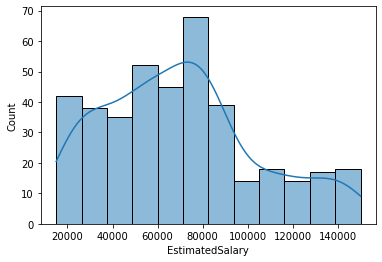

In [13]:
sns.histplot(data['EstimatedSalary'],kde=True)

<AxesSubplot:ylabel='Gender'>

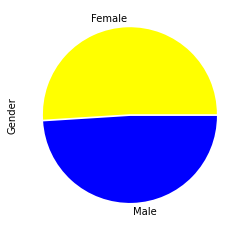

In [14]:
color=('yellow','blue')
explode=[0.01,0.01]
data['Gender'].value_counts().plot(kind='pie',colors=color,explode=explode)

In [15]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl

In [34]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=1)
kmeans.fit(X_train)


KMeans(n_clusters=5, n_init=10, random_state=1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.stripplot(x='Old Age', y='Young Age', data=X_train, jitter=True)

plt.xlabel('Old Age')
plt.ylabel('Young Age')
plt.title('Strip Plot of Old Age vs Young Age')

plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1)

In [20]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl

In [21]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [22]:
kmeans.fit(X_train)

C:\Users\anjan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anjan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [23]:
from sklearn.cluster import KMeans

# Create KMeans object
kmeans = KMeans(n_clusters=5, random_state=1)

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
print(labels)


[3 4 0 1 1 4 4 3 4 0 1 1 0 2 1 4 3 1 4 0 3 4 1 3 4 3 1 4 1 0 1 3 3 3 2 0 3
 3 3 2 1 0 1 3 1 1 1 2 3 0 0 4 1 4 3 4 4 3 3 4 3 2 3 4 1 0 1 3 1 3 0 1 4 3
 4 3 3 0 4 3 0 3 1 0 2 3 3 3 4 3 0 1 0 1 1 3 1 1 1 1 3 1 3 1 3 4 1 2 1 0 0
 3 0 2 1 3 1 3 2 1 3 0 3 4 4 4 1 0 1 0 4 4 4 0 3 1 1 0 0 0 1 1 1 3 4 4 0 4
 3 1 1 0 3 0 3 4 3 3 4 4 2 4 1 1 3 3 3 3 3 4 1 1 3 1 4 0 2 3 0 4 1 1 4 1 1
 3 4 4 3 0 3 3 0 2 4 1 1 4 4 3 1 0 0 3 2 1 0 1 1 3 3 1 0 4 0 1 1 4 0 3 4 1
 4 0 4 0 3 4 4 2 1 0 3 1 0 3 1 4 0 1 1 1 0 0 0 0 0 1 2 0 1 1 2 3 3 4 1 0 3
 3 0 0 4 0 1 3 1 4 3 3 4 4 3 4 0 0 3 0 0 1]


C:\Users\anjan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anjan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [24]:
clusters = kmeans.predict(X_train)

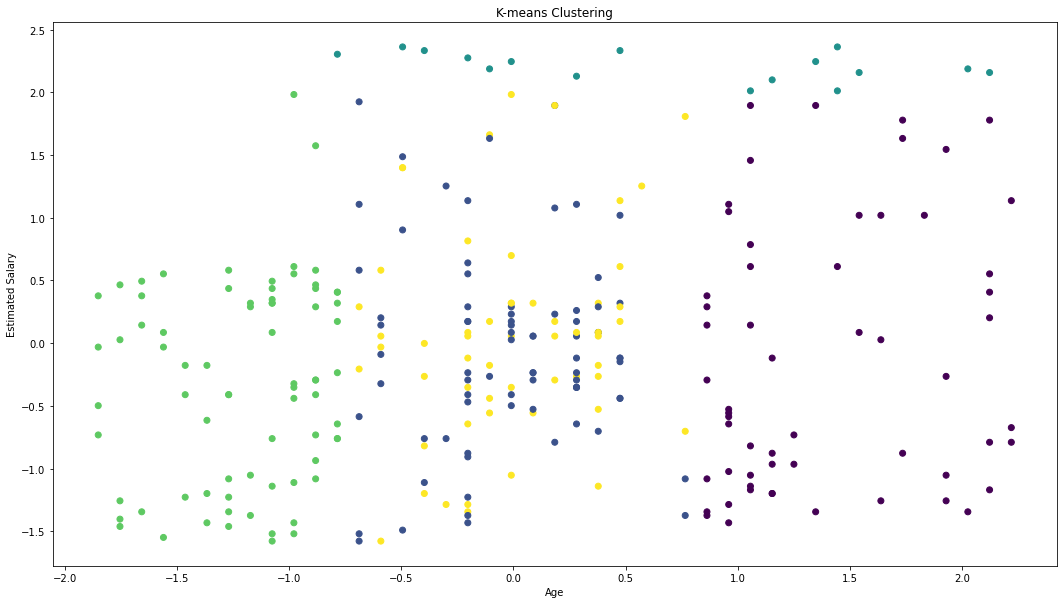

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))  # Set the figure size to (10, 8)

# Scatter plot with cluster colors
plt.scatter(X_train['Age'], X_train['EstimatedSalary'], c=clusters, cmap='viridis')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('K-means Clustering')

plt.show()

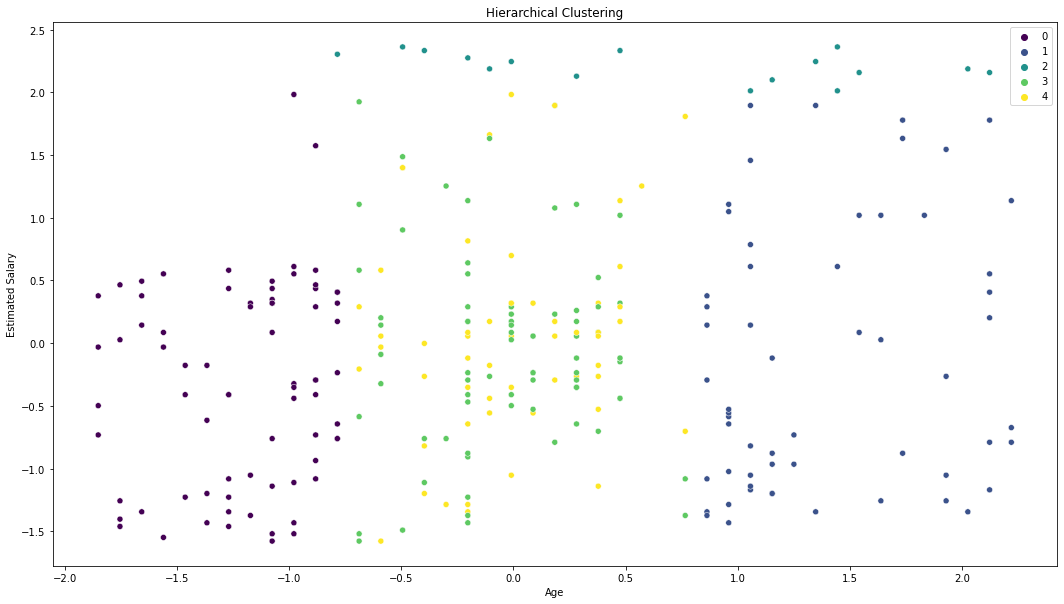

In [29]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=5)
clusters = hc.fit_predict(X_train)

# Plot the clusters
plt.figure(figsize=(18, 10))
sns.scatterplot(x='Age', y='EstimatedSalary', hue=clusters, data=X_train, palette='viridis')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Hierarchical Clustering')
plt.show()

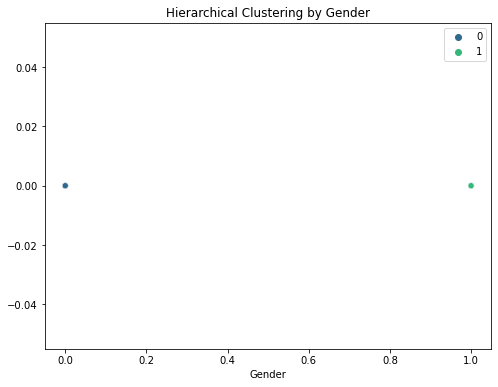

In [30]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Encode gender variable (Female: 0, Male: 1)
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

# Select the 'Gender' column for clustering
X = df[['Gender']]

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=2)
clusters = hc.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gender', y=0, hue=clusters, data=X, palette='viridis')

plt.xlabel('Gender')
plt.ylabel('')
plt.title('Hierarchical Clustering by Gender')
plt.show()

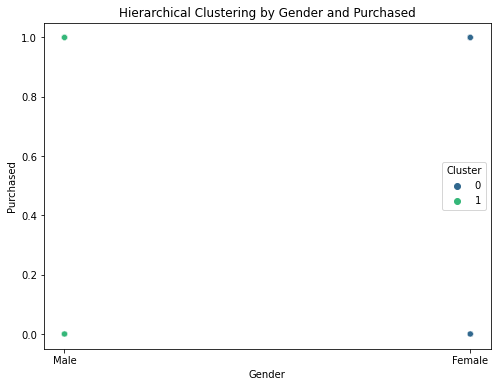

In [32]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Perform one-hot encoding for 'Gender' column
X_encoded = pd.get_dummies(data['Gender'])

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=2)
clusters = hc.fit_predict(X_encoded)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gender', y='Purchased', hue='Cluster', data=data, palette='viridis')

plt.xlabel('Gender')
plt.ylabel('Purchased')
plt.title('Hierarchical Clustering by Gender and Purchased')
plt.show()


In [ ]:
#Density based clustering

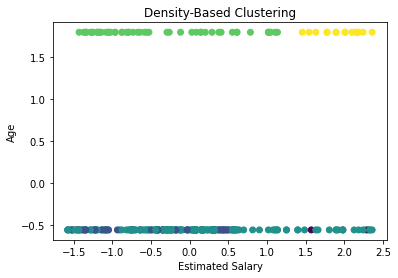

In [33]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Create a numpy array with the columns of interest
X = X_train[['EstimatedSalary', 'Old Age', 'Young Age']].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.title('Density-Based Clustering')
plt.show()

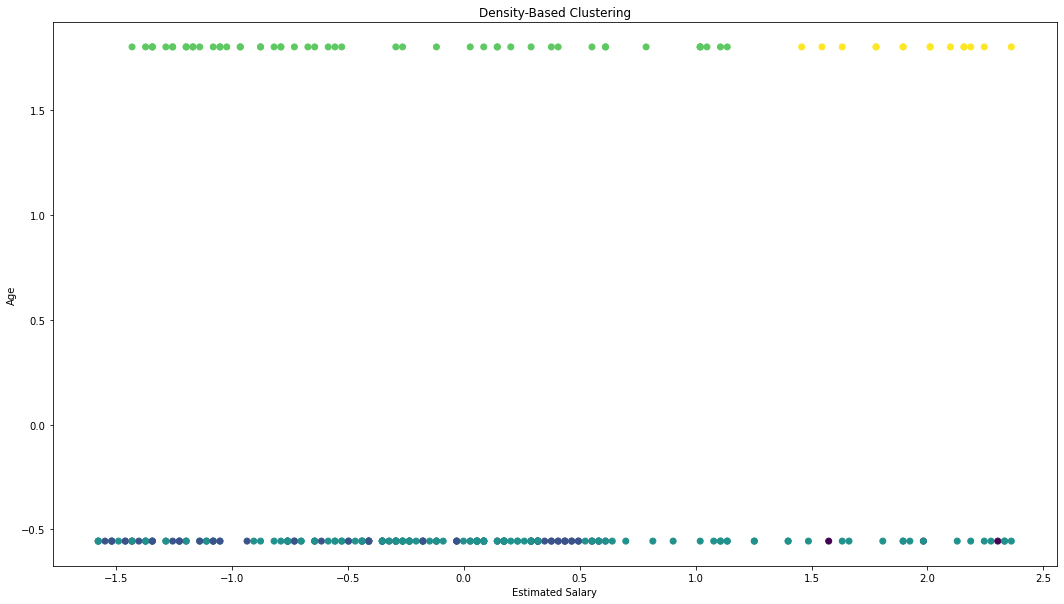

In [34]:
# Create a numpy array with the columns of interest
X = X_train[['EstimatedSalary', 'Old Age', 'Young Age']].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

# Set the figure size
plt.figure(figsize=(18, 10))

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Estimated Salary')
plt.ylabel('Age')
plt.title('Density-Based Clustering')
plt.show()

In [ ]:
# GaussianMixture

In [18]:
import os
os.environ['OMP_NUM_THREADS'] = '2'

In [19]:
from sklearn.mixture import GaussianMixture

# Initialize GMM model
gmm = GaussianMixture(n_components=3, random_state=1)

# Fit GMM model to the data
gmm.fit(X_train[['EstimatedSalary', 'Old Age', 'Young Age']])

# Predict cluster labels
clusters = gmm.predict(X_train[['EstimatedSalary', 'Old Age', 'Young Age']])

In [20]:
print(clusters)

[1 0 0 0 0 2 0 1 0 0 0 0 0 2 0 0 1 0 0 2 1 0 0 1 0 1 0 0 0 0 2 1 1 1 2 2 1
 1 1 2 0 2 0 1 0 2 0 2 1 2 2 0 0 0 1 0 0 1 1 0 1 2 1 0 0 0 0 1 2 1 2 0 0 1
 0 1 1 0 0 1 0 1 0 2 2 1 1 1 0 1 0 2 2 0 0 1 0 0 0 2 1 0 1 2 1 0 0 2 0 0 0
 1 2 1 0 1 0 1 2 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 2 1 0 1 0 1 1 2 0 2 0 0 2 1 1 1 1 1 2 0 0 1 0 0 2 2 1 2 0 0 0 0 2 0
 1 0 0 1 0 1 1 2 2 2 0 0 0 2 1 0 2 0 1 2 0 0 0 0 1 1 0 0 0 0 0 0 2 0 1 0 0
 2 0 0 2 1 2 0 2 2 0 1 0 2 1 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 2 1 1 0 0 2 1
 1 0 2 0 0 0 1 0 0 1 1 0 0 1 0 0 2 1 0 2 0]


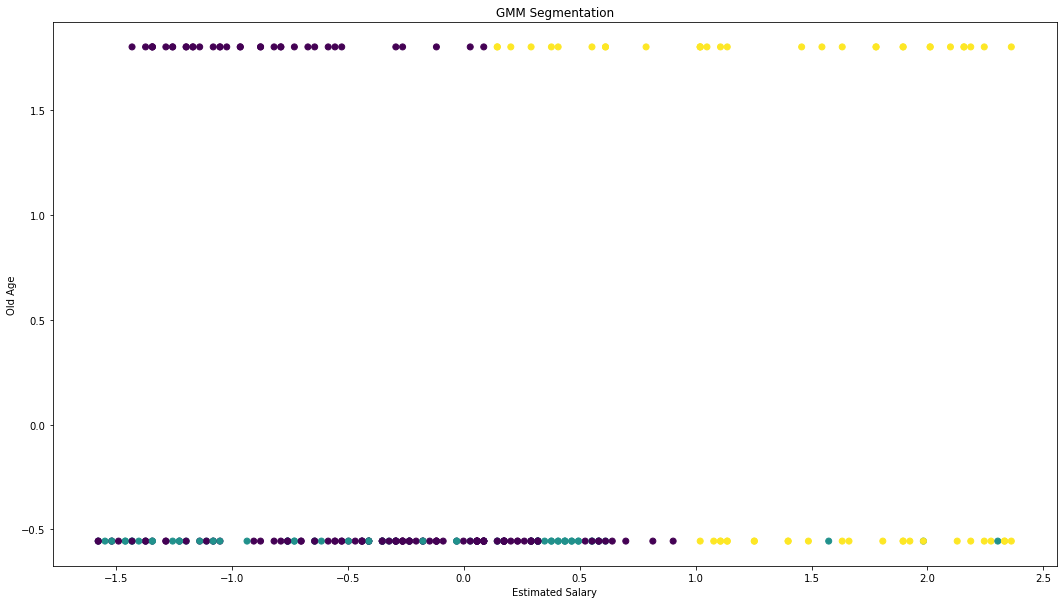

In [22]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 10))

# Create scatter plot
plt.scatter(X_train['EstimatedSalary'], X_train['Old Age'], c=clusters, cmap='viridis')

# Set axis labels
plt.xlabel('Estimated Salary')
plt.ylabel('Old Age')

# Set plot title
plt.title('GMM Segmentation')

# Show the plot
plt.show()


In [ ]:
#Agglomerative clustering

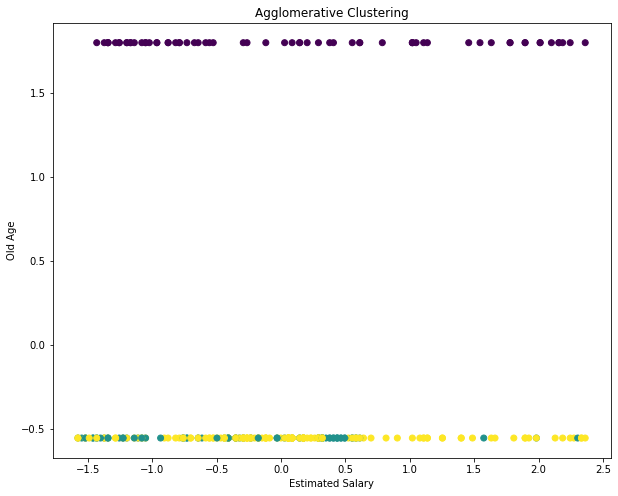

In [24]:
# Initialize Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model to the data
clusters = agg_clustering.fit_predict(X_train[['EstimatedSalary', 'Old Age', 'Young Age']])

# Set figure size
plt.figure(figsize=(10, 8))

# Plot the clusters
plt.scatter(X_train['EstimatedSalary'], X_train['Old Age'], c=clusters, cmap='viridis')
plt.xlabel('Estimated Salary')
plt.ylabel('Old Age')
plt.title('Agglomerative Clustering')

plt.show()

In [ ]:
#Spectral clustering

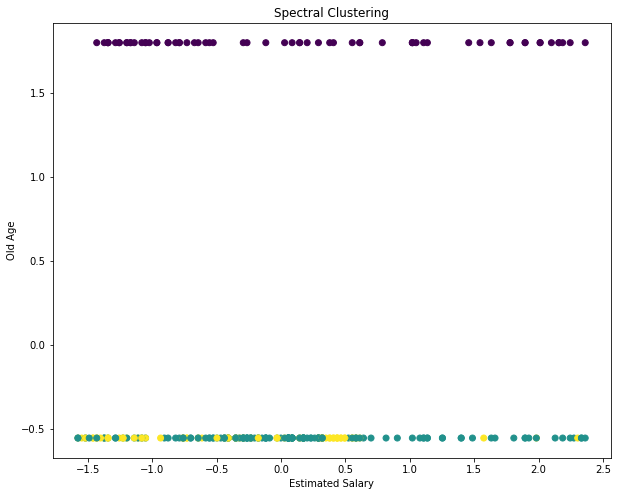

In [26]:
# Initialize Spectral Clustering model
spectral_clustering = SpectralClustering(n_clusters=3, random_state=1)

# Fit the model to the data
clusters = spectral_clustering.fit_predict(X_train[['EstimatedSalary', 'Old Age', 'Young Age']])

# Set figure size
plt.figure(figsize=(10, 8))

# Plot the clusters
plt.scatter(X_train['EstimatedSalary'], X_train['Old Age'], c=clusters, cmap='viridis')
plt.xlabel('Estimated Salary')
plt.ylabel('Old Age')
plt.title('Spectral Clustering')

plt.show()